The timestep is 0.5 ps
The timestep is 1.0 ps
The timestep is 2.0 ps
The timestep is 4.0 ps
The timestep is 8.0 ps
The timestep is 16.0 ps


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


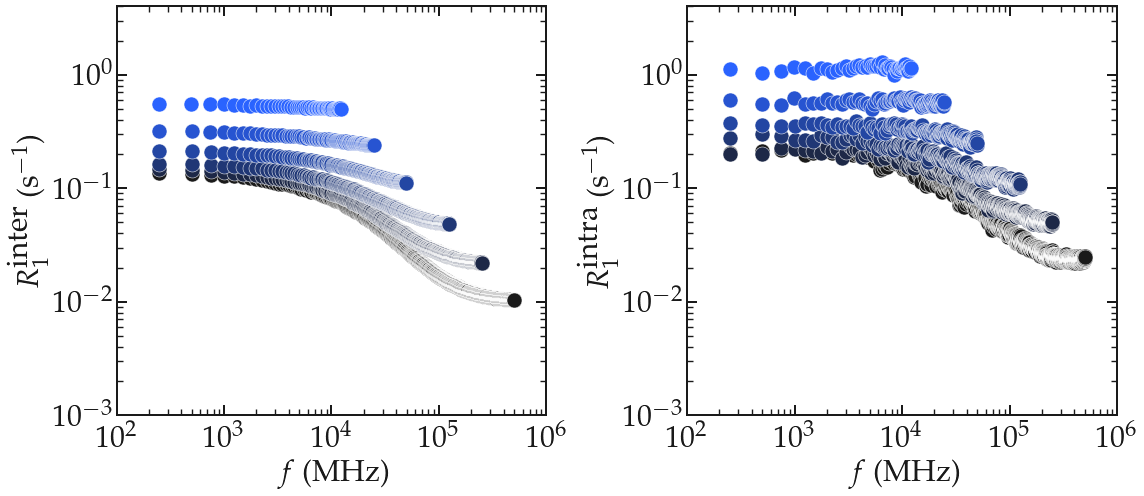

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


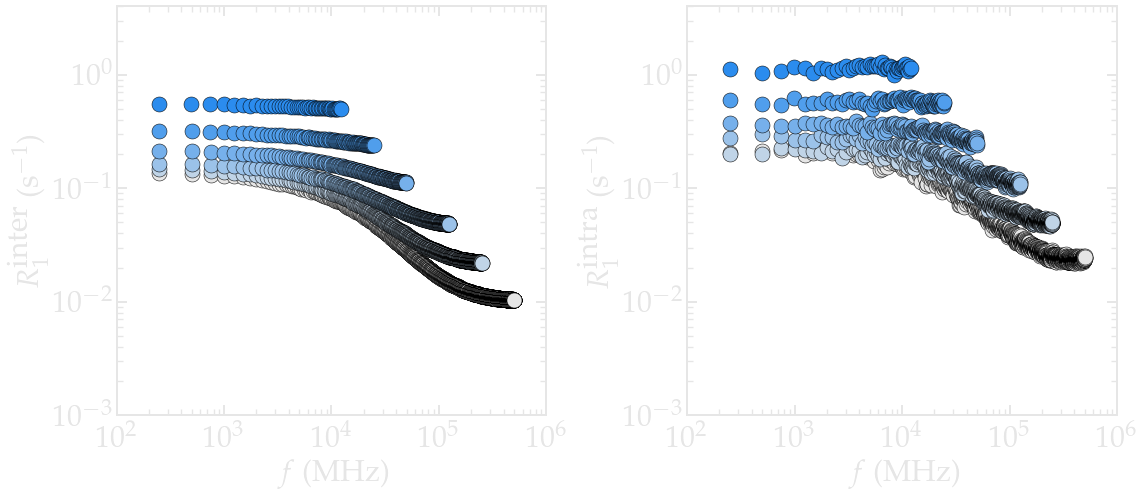

In [1]:
# Import libraries
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

recalculate=True

# For figure plotting
import sys
from matplotlib import pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
msize = 15
fontsize = 30
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue_light = [42/ 255, 99/255, 255/ 255] # [0/ 255, 150/255, 177/ 255]
myblue_dark = [43/ 255, 140/255, 238/ 255] # [0/ 255, 150/255, 177/ 255]
myred= [244/ 255, 143/255, 97/ 255] # [255/ 255, 77/255, 77/ 255]
mygreen = [122/255, 190/255, 165/255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]
white = [0, 0, 0]
black = [1, 1, 1]
sys.path.append('../../shared/')
from tools import figure_improvement, save_figure

# Path to data
datapath = "../../raw-data/bulk-water/N3000-high-resolution/"

all_R1_intra = []
all_gij_intra = []
all_R1_inter = []
all_gij_inter = []
if recalculate:
    for step in [1, 2, 4, 8, 16, 32]:
        # Create a MDAnalysis universe
        u = mda.Universe(datapath+"run.tpr", datapath+"run.xtc")
        u.transfer_to_memory(step=step)
        # Print a few information
        n_molecules = u.atoms.n_residues
        #print(f"The number of water molecules is {n_molecules}")
        timestep = np.round(u.trajectory.dt,2)
        print(f"The timestep is {timestep} ps")
        total_time = np.int32(u.trajectory.totaltime)
        #print(f"The total simulation time is {total_time} ps")
        group_i = u.select_atoms("type HW")
        nmr = nmrmd.NMR(u, group_i, number_i=1000, type_analysis="intra_molecular", isotropic=True)
        # R1
        f, R1 = np.vstack([nmr.f, nmr.R1])
        R1_complete = np.zeros((2, 4000)).T
        cpt = 0
        for f0, R10 in zip(f[:4000], R1[:4000]):
            R1_complete[cpt] = f0, R10
            cpt += 1
        all_R1_intra.append(R1_complete)
        # gij
        t, gij = np.vstack([nmr.t, nmr.gij])
        gij_complete = np.zeros((2, 4000)).T
        cpt = 0
        for f0, R10 in zip(t[:4000], gij[:4000]):
            gij_complete[cpt] = f0, R10
            cpt += 1
        all_gij_intra.append(gij_complete)
        nmr = nmrmd.NMR(u, group_i, number_i=20, type_analysis="inter_molecular", isotropic=True)
        # R1
        f, R1 = np.vstack([nmr.f, nmr.R1])
        R1_complete = np.zeros((2, 4000)).T
        cpt = 0
        for f0, R10 in zip(f[:4000], R1[:4000]):
            R1_complete[cpt] = f0, R10
            cpt += 1
        all_R1_inter.append(R1_complete)
        # gij
        t, gij = np.vstack([nmr.t, nmr.gij])
        gij_complete = np.zeros((2, 4000)).T
        cpt = 0
        for f0, R10 in zip(t[:4000], gij[:4000]):
            gij_complete[cpt] = f0, R10
            cpt += 1
        all_gij_inter.append(gij_complete)
    
    all_R1_intra = np.vstack([all_R1_intra[0].T, all_R1_intra[1].T, all_R1_intra[2].T, all_R1_intra[3].T, all_R1_intra[4].T, all_R1_intra[5].T])
    np.savetxt("../../treated-data/best-practice/bulk-water/R1_intra_dumping_frequency.dat", all_R1_intra.T)
    all_R1_inter = np.vstack([all_R1_inter[0].T, all_R1_inter[1].T, all_R1_inter[2].T, all_R1_inter[3].T, all_R1_inter[4].T, all_R1_inter[5].T])
    np.savetxt("../../treated-data/best-practice/bulk-water/R1_inter_dumping_frequency.dat", all_R1_inter.T)
    all_gij_intra = np.vstack([all_gij_intra[0].T, all_gij_intra[1].T, all_gij_intra[2].T, all_gij_intra[3].T, all_gij_intra[4].T, all_gij_intra[5].T])
    np.savetxt("../../treated-data/best-practice/bulk-water/gij_intra_dumping_frequency.dat", all_gij_intra.T)
    all_gij_inter = np.vstack([all_gij_inter[0].T, all_gij_inter[1].T, all_gij_inter[2].T, all_gij_inter[3].T, all_gij_inter[4].T, all_gij_inter[5].T])
    np.savetxt("../../treated-data/best-practice/bulk-water/gij_inter_dumping_frequency.dat", all_gij_inter.T)
else:
    all_R1_intra = np.loadtxt("../../treated-data/best-practice/bulk-water/R1_intra_dumping_frequency.dat").T
    all_R1_inter = np.loadtxt("../../treated-data/best-practice/bulk-water/R1_inter_dumping_frequency.dat").T
    all_gij_intra = np.loadtxt("../../treated-data/best-practice/bulk-water/gij_intra_dumping_frequency.dat").T
    all_gij_inter = np.loadtxt("../../treated-data/best-practice/bulk-water/gij_inter_dumping_frequency.dat").T

cut_offs = [2000, 3000, 3500, 3800, 3900, 3950]
for mode, mygray, edge, myblue in zip(['light', 'dark'], [lightgray, darkgray], [black, white], [myblue_light, myblue_dark]):

    R = np.linspace(mygray[0], myblue[0], len(all_R1_intra)//2)
    G = np.linspace(mygray[1], myblue[1], len(all_R1_intra)//2)
    B = np.linspace(mygray[2], myblue[2], len(all_R1_intra)//2)
    grad = np.vstack([R, G, B]).T

    fig = plt.figure(figsize=(16, 7))
    ax1 = fig.add_subplot(121)
    cpt = 0
    for f, R1 in zip(all_R1_inter[::2], all_R1_inter[1::2]):
        cut_off = cut_offs[cpt]
        ax1.loglog(f[:-cut_off], R1[:-cut_off], 'o', markersize=msize, color=grad[cpt], markeredgecolor=edge, markeredgewidth=0.5) #, label="Intra-molecular")
        #print(cut_off, len(f), len(f[:-cut_off]))
        cpt += 1
    figure_improvement(ax1, mygray, font, fontsize,
                    xlabel=r"$f$ (MHz)", ylabel=r'$R_1^\textrm{inter}$ (s$^{-1}$)',
                    xlim=(100, 1e6), ylim=(1e-3, 4))
    ax1 = fig.add_subplot(122)
    cpt = 0
    for f, R1 in zip(all_R1_intra[::2], all_R1_intra[1::2]):
        cut_off = cut_offs[cpt]
        ax1.loglog(f[:-cut_off], R1[:-cut_off], 'o', markersize=msize, color=grad[cpt], markeredgecolor=edge, markeredgewidth=0.5) #, label="Intra-molecular")
        #print(cut_off, len(f), len(f[:-cut_off]))
        cpt += 1
    figure_improvement(ax1, mygray, font, fontsize,
                    xlabel=r"$f$ (MHz)", ylabel=r'$R_1^\textrm{intra}$ (s$^{-1}$)',
                    xlim=(100, 1e6), ylim=(1e-3, 4))
    save_figure(plt, fig, mode, name='tutorials/bulk-water/R1-inter-dumping-frequency', save=True)